In [2]:
#Generalized AutoRegressive Conditional Heteroskedasticity

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

In [3]:
# Fetching Apple stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')

# Display the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.568928  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.561867  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.750278   89738400
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.214233   94640000
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.061153   82271200


In [10]:
# Calculate log returns
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Rescale log returns by a constant factor
scale_factor = 100
data['Log_Returns'] = data['Log_Returns'] * scale_factor

# Drop the NaN values that result from the shift
data = data.dropna()

# Display the first few rows of log returns
print(data[['Adj Close', 'Log_Returns']].head())

            Adj Close  Log_Returns
Date                              
2018-01-08  41.061153    -0.372117
2018-01-09  41.056442    -0.011474
2018-01-10  41.047005    -0.022989
2018-01-11  41.280163     0.566420
2018-01-12  41.706448     1.027367


In [11]:
# Fit GARCH(1, 1) model
model = arch_model(data['Log_Returns'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Display the model summary
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7583.590175993634
Iteration:      2,   Func. Count:     16,   Neg. LLF: 63223930348.22206
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3122.916181963851
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3057.401942030443
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2585.3348733779767
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2584.995123300686
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2584.994371770865
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2584.9943075606843
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2584.994301194464
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2584.9943003934886
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2584.9943003934886
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results           

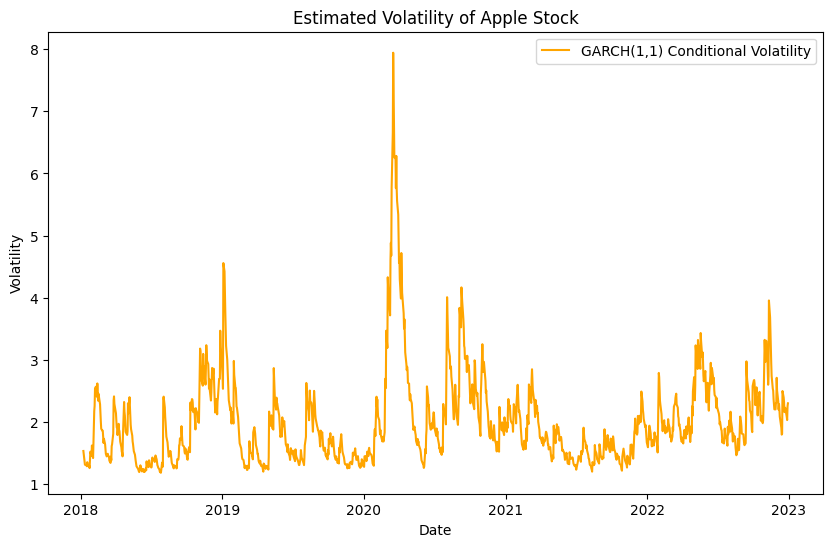

In [12]:
# Plot the estimated volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility, label='GARCH(1,1) Conditional Volatility', color='orange')
plt.title('Estimated Volatility of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()